In [1]:
import statsmodels.api as sm
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

#import data
test_data = pd.read_csv("test.data.csv")
train_data = pd.read_csv("train.data.csv")
fancy_house = pd.read_csv("fancyhouse.csv")
train_data['bed_bath_interaction'] = train_data['bedrooms'] * train_data['bathrooms']
test_data['bed_bath_interaction'] = test_data['bedrooms'] * test_data['bathrooms']
fancy_house['bed_bath_interaction'] = fancy_house['bedrooms'] * fancy_house['bathrooms']

In [2]:
#a) R^2 on training data
features = ['bedrooms',"bathrooms","sqft_living","sqft_lot"]
features_w_interaction = ['bedrooms','bathrooms','sqft_living','sqft_lot','bed_bath_interaction']
y_train = train_data[["price"]]
y_test = test_data[["price"]]


In [51]:
#fit model
#standardize the fellas

X_train = StandardScaler().fit_transform(train_data[features])
X_test = StandardScaler().fit_transform(test_data[features])

linear_model = LinearRegression().fit(X_sample = X_train, y = y_train)

#generate predictions using train data to calculate training R^2
train_preds = linear_model.predict(X_train)
test_preds = linear_model.predict(X_test)

print("Training R^2:  {}".format(r2_score(y_true = y_train,y_pred=train_preds)))
print("Test R^2:  {}".format(r2_score(y_true = y_test, y_pred=test_preds)))


Training R^2:  0.5101138530794578
Test R^2:  0.5049329463821026


In [55]:
#b)


#standardize fancy_house data
transformer = StandardScaler()
transformer.fit_transform(train_data[features]) #calculate the mean of the train data  and std
fancy_scaled = transformer.transform(fancy_house[features]) #use the standardization from the train_data on the fancy_house data

#predict price of the house
predicted_price = linear_model.predict(fancy_scaled)

print("Predicted Price of Bill Gate's House:   {}".format(predicted_price[0]))

#


Predicted Price of Bill Gate's House:   [15436769.53822249]


15 milly for Bill Gate's compound? Seems  a little low honestly

In [6]:
#c)
#update data with new variable

linear_model = LinearRegression().fit(X = train_data[features_w_interaction], y = y_train)

#generate predictions using train data to calculate training R^2
train_preds = linear_model.predict(train_data[features_w_interaction])
test_preds = linear_model.predict(test_data[features_w_interaction])

print("New Training R^2:  {}".format(r2_score(y_true = y_train,y_pred=train_preds)))
print("New Test R^2:  {}".format(r2_score(y_true = y_test, y_pred=test_preds)))


New Training R^2:  0.5173532927738305
New Test R^2:  0.5105355458590626


**Part d)**

In [7]:
import scipy
def rsquared(y_true, y_pred):
    #if its not an np.ndarray
    if(type(y_true) == pd.DataFrame):
        y_true = y_true.to_numpy()
    if(type(y_true) == list):
        y_true = np.asarray(y_true)
    
    if(type(y_pred) == pd.DataFrame):
        y_pred = y_pred.to_numpy()

    if(type(y_pred) == list):
        y_pred = np.asarray(y_pred)
    res = scipy.stats.linregress(y_true, y_pred)
    return res.rvalue**2

In [226]:
def gd(X,y,learning_parameter = .00001,tau = .001, max_iter = 20000):

    n = len(y)
    p = X.shape[1]
    #intial "guess" (first) iteration of betas
    beta = np.ones(p)

    #reshape so calculations can be performed
    beta = beta.reshape(p,1)
    y = np.array(y)
    
    #use this to store SSE
    MSE_list = list()
    
    #standardize  X (seems to help convergence)
    standardizer = StandardScaler()
    standardizer.fit_transform(X)
    X = standardizer.fit_transform(X)

    iter_counter = 0 #count number of iterations

    while True:
        
        #calculate the gradient
        gradient_vector = X.T @ (X @ beta - y)

        #calculate the norm of the vector. Used to determine whether loop should continue
        gradient_vector_norm = np.linalg.norm(gradient_vector)

        #update beta vector
        beta = beta - learning_parameter * gradient_vector 

        y_pred = X @ beta #calculate predicted values

        #calculate current iterations MSE and add to list
        MSE = mean_squared_error(y_true = y, y_pred = y_pred)
        MSE_list.append(MSE)

        iter_counter += 1 #update counter
        print('Iteration: {}, Norm of Gradient:  {}'.format(iter_counter,gradient_vector_norm))

        if(gradient_vector_norm < tau or iter_counter > max_iter): #if norm of gradient falls below threshold end loop
            break
    r_squared_calc = rsquared(y.flatten(),y_pred.flatten()) #calculate R-squared
    print("R-Squared:   {:.5f}".format(r_squared_calc))   
    return(beta,MSE_list, y, y_pred, standardizer)


In [227]:

beta,returned_MSE_list, y, y_pred, standardizer = gd(train_data[features],y = y_train, learning_parameter = .00004, tau = .01)

Iteration: 1, Norm of Gradient:  5185991300.341278
Iteration: 2, Norm of Gradient:  2072809273.682034
Iteration: 3, Norm of Gradient:  1003031617.6659364
Iteration: 4, Norm of Gradient:  642460381.35682
Iteration: 5, Norm of Gradient:  491564663.9651663
Iteration: 6, Norm of Gradient:  401327662.5138394
Iteration: 7, Norm of Gradient:  335293725.70789415
Iteration: 8, Norm of Gradient:  283150637.32664466
Iteration: 9, Norm of Gradient:  240612306.80368227
Iteration: 10, Norm of Gradient:  205271567.18063077
Iteration: 11, Norm of Gradient:  175566360.17691374
Iteration: 12, Norm of Gradient:  150405267.71778882
Iteration: 13, Norm of Gradient:  128985141.0977269
Iteration: 14, Norm of Gradient:  110689659.73710419
Iteration: 15, Norm of Gradient:  95029787.73691219
Iteration: 16, Norm of Gradient:  81607563.5331986
Iteration: 17, Norm of Gradient:  70093224.45180923
Iteration: 18, Norm of Gradient:  60210092.023285896
Iteration: 19, Norm of Gradient:  51724080.726320885
Iteration: 20,

In [228]:
beta

array([[-55655.71729065],
       [  2842.59687339],
       [290948.51916706],
       [-16587.41536862]])

In [40]:
#training r2
training_r2 = rsquared(y_true = y.flatten(), y_pred = y_pred.flatten())

#generate predictions
X_test = StandardScaler().fit_transform(test_data[features])
test_predictions = X_test @ beta

test_r2 = rsquared(y_true = y_test.to_numpy().flatten(), y_pred= test_predictions.flatten())


In [41]:
# Repeat a)
print("Training R2 from Gradient Descent Regression Implementation:   {:.5f}".format(training_r2))
print("Testing R2 from Gradient Descent Regression Implementation:   {:.5f}".format(test_r2))


Training R2 from Gradient Descent Regression Implementation:   0.51011
Testing R2 from Gradient Descent Regression Implementation:   0.50526


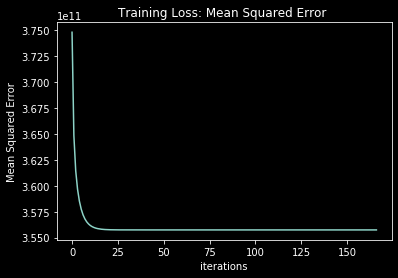

In [42]:
from matplotlib import style
style.use('dark_background')
plt.figure()
plt.plot(np.arange(0, len(returned_MSE_list)), returned_MSE_list) ## fix
plt.title("Training Loss: Mean Squared Error ")
plt.xlabel("iterations")
plt.ylabel("Mean Squared Error")
plt.show()

In [ ]:
#Repeat b)

beta,returned_MSE_list, y, y_pred, standardizer = gd(train_data[features],y = y_train, learning_parameter = .00004, tau = .01)

#need to standardize fancy_house data using the mean and std from the training data
fancy_house_scaled = standardizer.transform(fancy_house[features])


fancy_house_scaled @ beta


In [ ]:
# Repeat part c)
beta,returned_MSE_list, y, y_pred, standardizer = gd(train_data[features_w_interaction],y = y_train, learning_parameter = .00004, tau = .01)

In [57]:
#training r2
training_r2 = rsquared(y_true = y.flatten(), y_pred = y_pred.flatten())

#generate predictions
X_test = StandardScaler().fit_transform(test_data[features_w_interaction])
test_predictions = X_test @ beta

test_r2 = rsquared(y_true = y_test.to_numpy().flatten(), y_pred= test_predictions.flatten())

In [58]:
# Repeat a)
print("Training R2 from Gradient Descent Regression Implementation (additional features):   {:.5f}".format(training_r2))
print("Testing R2 from Gradient Descent Regression Implementation (additional features):   {:.5f}".format(test_r2))


Training R2 from Gradient Descent Regression Implementation (additional features):   0.51735
Testing R2 from Gradient Descent Regression Implementation (additional features):   0.51083


**Part e**

In [247]:
#use this in gradient descent function
def loss_fn(prediction, y):
    return np.sum((prediction - y)**2)


#Implementing Stochastic Gradient Descent
def sgd(X:pd.DataFrame, y:pd.DataFrame, learning_parameter = .0000004,tau = .001, max_iter = 15000, batch_size = 2):

    #list to keep track of mse at each iteration 
    mse_list = []

    #make X and y np.arrays because quite frankly that shit is easier to work with
    standardizer = StandardScaler()
    standardizer.fit_transform(X)
    X = standardizer.fit_transform(X)
    y = y.to_numpy() #maybe need to FLATTEN

    #get n and p
    n = len(y)
    p = X.shape[1]

    #starting point for beta vector
    beta = np.ones(p).reshape(p,1)

    #loop until iterations exceed max_iter or the norm of the gradient vector falls below the threshold 'tau'
    iter_counter = 0
    while True:

        #convert X and Y to dataFrames for simplicity of dropping by index
        X_df = pd.DataFrame(X)
        y_df = pd.DataFrame(y)

        #obtain a random sample from the dataframe. we will access its index
        batch = X_df.sample(batch_size)

        #drop the index (batch) from both X and y
        X_batch = (X_df.drop(index = batch.index)).to_numpy()
        y_batch = (y_df.drop(index = batch.index)).to_numpy()

        #generate prediction and calculate error
        y_pred = X_batch @ beta

        #calculate MSE
        loss = loss_fn(prediction = y_pred, y = y_batch)
        mse_list.append(loss) #add it to the mse_list

        #calculate the gradient
        gradient_vector = X_batch.T @ (X_batch @ beta - y_batch)

        #calculate the norm of the vector. Used to determine whether loop should continue
        gradient_vector_norm = np.linalg.norm(gradient_vector)

        #update beta vector
        beta = beta - (1/batch_size)*learning_parameter * gradient_vector

        

        print('Iteration: {}, Norm of Gradient:  {}'.format(iter_counter,gradient_vector_norm))
        # r_squared_calc = rsquared(y.flatten(),y_pred.flatten()) #calculate R-squared
        # print("R-Squared:   {:.5f}".format(r_squared_calc))

        iter_counter += 1
        if(gradient_vector_norm < tau or iter_counter > max_iter): #for testing purposes
            break
    
    return(beta,mse_list)

    #



In [248]:
sgd_beta, returned_mse = sgd(train_data[features],y_train)

Iteration: 0, Norm of Gradient:  5184239440.018096
Iteration: 1, Norm of Gradient:  5153185555.045045
Iteration: 2, Norm of Gradient:  5118176112.596912
Iteration: 3, Norm of Gradient:  5084720684.075273
Iteration: 4, Norm of Gradient:  5052241454.212775
Iteration: 5, Norm of Gradient:  5018614107.61433
Iteration: 6, Norm of Gradient:  4988213918.236905
Iteration: 7, Norm of Gradient:  4955690183.361375
Iteration: 8, Norm of Gradient:  4923246392.467472
Iteration: 9, Norm of Gradient:  4890264349.677706
Iteration: 10, Norm of Gradient:  4859420728.722968
Iteration: 11, Norm of Gradient:  4828603695.715225
Iteration: 12, Norm of Gradient:  4797954656.583221
Iteration: 13, Norm of Gradient:  4765704513.017697
Iteration: 14, Norm of Gradient:  4735821533.147014
Iteration: 15, Norm of Gradient:  4703904586.405896
Iteration: 16, Norm of Gradient:  4675347182.722118
Iteration: 17, Norm of Gradient:  4645729432.0157385
Iteration: 18, Norm of Gradient:  4615006302.3998995
Iteration: 19, Norm o

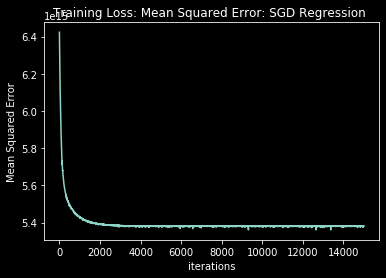

In [251]:
#plot the error
from matplotlib import style
style.use('dark_background')
plt.figure()
plt.plot(np.arange(0, len(returned_mse)), returned_mse) ## fix
plt.title("Training Loss: Mean Squared Error: SGD Regression ")
plt.xlabel("iterations")
plt.ylabel("Mean Squared Error")
plt.show()


In [244]:
beta

array([[-55655.71729065],
       [  2842.59687339],
       [290948.51916706],
       [-16587.41536862]])

In [249]:
sgd_beta

array([[-55654.48314484],
       [  2844.8165508 ],
       [290943.21112303],
       [-16585.92188236]])

In [268]:
# repeat part a)
#First R2 on Training Data

#generate predictions
#first standardize data

train_data_standardized = StandardScaler().fit_transform(train_data[features])
y_pred_train = train_data_standardized @ sgd_beta

#calculate r2 on training data
r2_train = rsquared(y_true = y_train.to_numpy().flatten(), y_pred = y_pred_train.flatten())


#now for testing data
test_data_standardized = StandardScaler().fit_transform(test_data[features])
y_pred_test = test_data_standardized @ sgd_beta

r2_test = rsquared(y_true = y_test.to_numpy().flatten(), y_pred = y_pred_test.flatten())

#print results
print("Training R2 w/ SGD:   {}".format(r2_train))
print("Testing R2 w/ SGD:   {}".format(r2_test))

Training R2 w/ SGD:   0.5101138530501275
Testing R2 w/ SGD:   0.5052643936890526


In [282]:
#repeat part b)

#use standardized data
bill_gates_house = fancy_house_scaled @ sgd_beta
bill_gates_house_sgd_prediction = np.round(float(bill_gates_house[0]),2)
print("Predicted Price of Bill Gates' house w/ SGD:   ${:,}".format(bill_gates_house_sgd_prediction))


Predicted Price of Bill Gates' house w/ SGD:   $14,898,425.72


In [ ]:
#repeat part c)
#fit SGD with data with new variable

sgd_beta, returned_mse = sgd(train_data[features_w_interaction], y = y_train)


In [287]:
train_data_standardized = StandardScaler().fit_transform(train_data[features_w_interaction])
y_pred_train = train_data_standardized @ sgd_beta

#calculate r2 on training data
r2_train = rsquared(y_true = y_train.to_numpy().flatten(), y_pred = y_pred_train.flatten())


#now for testing data
test_data_standardized = StandardScaler().fit_transform(test_data[features_w_interaction])
y_pred_test = test_data_standardized @ sgd_beta

r2_test = rsquared(y_true = y_test.to_numpy().flatten(), y_pred = y_pred_test.flatten())

#print results
print("Training R2 w/ SGD:   {}".format(r2_train))
print("Testing R2 w/ SGD:   {}".format(r2_test))

Training R2 w/ SGD:   0.5167707396249791
Testing R2 w/ SGD:   0.510642863195971
